In [2]:
import pickle

bundle_path = "linear_svm_bundle.pkl"

with open(bundle_path, "rb") as f:
    svm_bundle = pickle.load(f)

print("Bundle keys:", svm_bundle.keys())

Bundle keys: dict_keys(['model_name', 'y_test', 'y_pred', 'y_scores', 'y_proba', 'confusion_matrix', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'log_loss', 'roc_auc_ovr', 'params', 'feature_names', 'X_test_sample', 'svm_pca_components', 'svm_pca_explained_variance_ratio', 'svm_X_test_pca', 'svm_y_test', 'svm_grid_x', 'svm_grid_y', 'svm_grid_pred'])


In [3]:
print(svm_bundle.keys())

dict_keys(['model_name', 'y_test', 'y_pred', 'y_scores', 'y_proba', 'confusion_matrix', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'log_loss', 'roc_auc_ovr', 'params', 'feature_names', 'X_test_sample', 'svm_pca_components', 'svm_pca_explained_variance_ratio', 'svm_X_test_pca', 'svm_y_test', 'svm_grid_x', 'svm_grid_y', 'svm_grid_pred'])


### Plot 1: Confusion Matrix (SVM)

<Figure size 700x600 with 0 Axes>

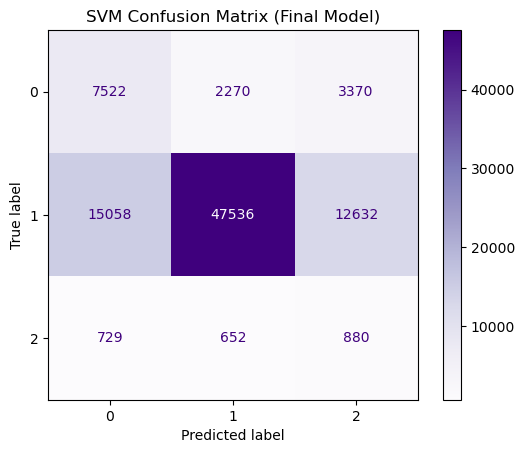

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = svm_bundle["confusion_matrix"]

plt.figure(figsize=(7,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples", values_format="d")
plt.title("SVM Confusion Matrix (Final Model)")
plt.grid(False)
plt.show()
plt.savefig("../../Results/Visualizations/Final_visualizations/SVM_Confusion_Matrix_plot.png", dpi=300, bbox_inches="tight")


### Plot 2: ROC Curve (One-vs-Rest)

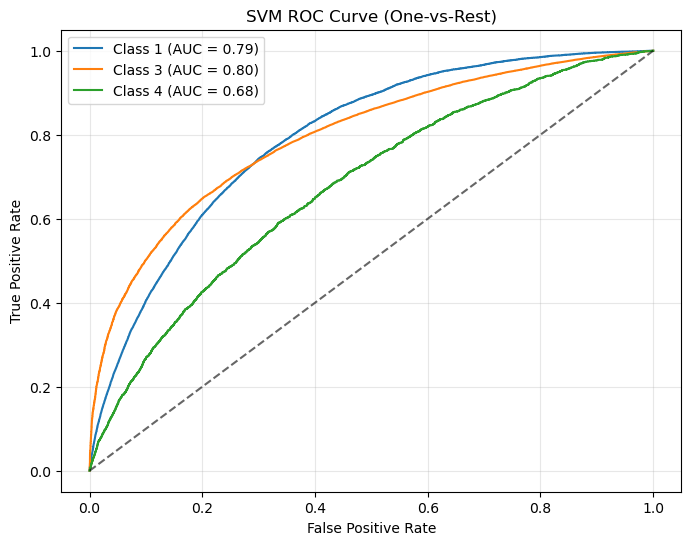

<Figure size 640x480 with 0 Axes>

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

y_test = svm_bundle["y_test"]
y_scores = svm_bundle["y_scores"]   # <-- use scores, not y_proba

classes = np.unique(y_test)
y_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--", alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
plt.savefig("../../Results/Visualizations/Final_visualizations/SVM_ROC_Curve_plot.png", dpi=300, bbox_inches="tight")


### Plot 3: SVM Decision Score Distribution

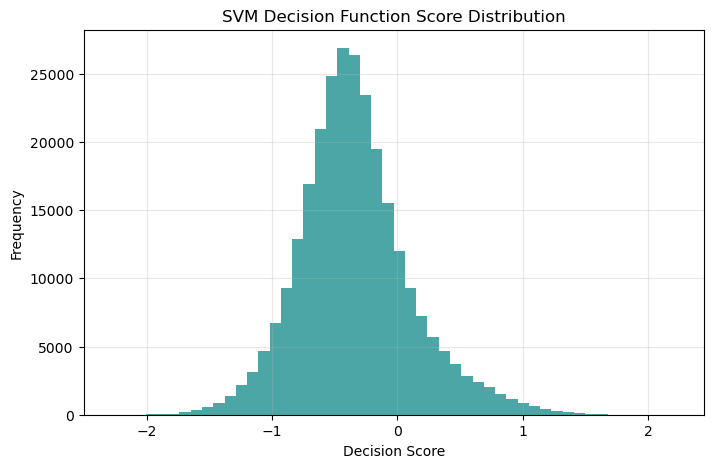

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

decision_scores = svm_bundle["y_scores"]

plt.figure(figsize=(8,5))
plt.hist(decision_scores.flatten(), bins=50, color="teal", alpha=0.7)
plt.title("SVM Decision Function Score Distribution")
plt.xlabel("Decision Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()
plt.savefig("../../Results/Visualizations/Final_visualizations/SVM_Decision_Score_Distribution_plot.png", dpi=300, bbox_inches="tight")


Interpretation : SVM Decision Function Score Distribution

This distribution shows how far each sample lies from the SVM decision boundary. Most decision scores cluster tightly around 0, indicating that a large portion of the data points lie very close to the margin—meaning the classes are not well separated in feature space. Only a small number of samples fall into the extreme tails, suggesting that the model is confident for very few points. This pattern reflects the difficulty of the dataset, the SVM struggles to form strong margins because the class boundaries heavily overlap.

### Plot 4: Interactive PCA Visualization

In [7]:
import plotly.graph_objects as go
import numpy as np

# Data from bundle
X_test_sample = svm_bundle["X_test_sample"]
y_test_full = svm_bundle["y_test"]
y_pred_full = svm_bundle["y_pred"]

# Match sizes
n = len(X_test_sample)
y_test = y_test_full[:n]
y_pred = y_pred_full[:n]
errors = (y_test != y_pred)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_sample)

# Correct vs incorrect
X_correct = X_pca[~errors]
X_wrong = X_pca[errors]

# --- Plotly ---
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X_correct[:, 0],
    y=X_correct[:, 1],
    mode='markers',
    name='Correct',
    marker=dict(size=6, color='rgba(0,180,0,0.7)'),
    hovertemplate="<b>Correct Prediction</b><br>PCA1=%{x:.2f}<br>PCA2=%{y:.2f}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=X_wrong[:, 0],
    y=X_wrong[:, 1],
    mode='markers',
    name='Misclassified',
    marker=dict(size=6, color='rgba(220,0,0,0.8)'),
    hovertemplate="<b>Misclassified</b><br>PCA1=%{x:.2f}<br>PCA2=%{y:.2f}<extra></extra>"
))

fig.update_layout(
    title="Interactive PCA Visualization (SVM Correct vs Misclassified)",
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    width=900,
    height=600,
    template="plotly_white"
)

fig.show()

# Save PNG version
fig.write_image("../../Results/Visualizations/Final_visualizations/SVM_PCA_plot.png")

# -----------------------------
# Add Interpretation to HTML
# -----------------------------
html_content = fig.to_html(
    include_plotlyjs="cdn",
    full_html=True
)

interpretation_html = """
<div style="margin-top: 20px; font-family: Arial; font-size: 15px; line-height: 1.6;">
    <h3>Interpretation: PCA Visualization (SVM Correct vs Misclassified)</h3>
    <p>
    This plot projects the data into two PCA components to visualize how separable the classes 
    are for SVM. The heavy overlap between green (correct) and red (misclassified) points shows 
    that the reduced feature space does not form clean, separable clusters.
    </p>
    <p>
    Misclassified points scatter throughout the same regions as correctly classified ones, 
    suggesting that the underlying class structure is highly tangled. This reinforces that the 
    dataset is inherently difficult for linear or margin-based models like SVM.
    </p>
</div>
"""

# Combine plot + interpretation
final_html = html_content.replace("</body>", interpretation_html + "</body>")

# Save HTML file
with open("../../docs/SVM_plot.html", "w") as f:
    f.write(final_html)


Interpretation: PCA Visualization (SVM Correct vs Misclassified)

This plot projects the data into two PCA components to visualize how separable the classes are for SVM. The heavy overlap between green (correct) and red (misclassified) points shows that the reduced feature space does not form clean, separable clusters. Misclassified points scatter throughout the same regions as correctly classified ones, suggesting the underlying class structure is highly tangled. This reinforces that the dataset is inherently difficult for linear or margin-based models like SVM.